In [1]:
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
plt.style.use('classic')

In [2]:
def read_metric_from_file(path):
    return json.load(path.open("r"))

def read_data(output_dir, filename, params, num_seed=0):
    metrics = defaultdict(list)
    for param in params:
        if num_seed == 0:
            path = Path(output_dir) / (filename.format(param).replace(".", "_") + ".json")
            metric = read_metric_from_file(path)
            for key in metric:
                metrics[key].append(float(metric[key]))
        else:
            metrics_ = defaultdict(list)
            for seed in range(1, num_seed + 1):
                path = Path(output_dir) / (filename.format(param, seed).replace(".", "_") + ".json")
                metric = read_metric_from_file(path)
                for key in metric:
                    metrics_[key].append(float(metric[key]))
            for key in metrics_:
                data = np.array(metrics_[key])
                metrics[f"{key}_mean"].append(data.mean())
                metrics[f"{key}_std"].append(data.std())
    return metrics

In [3]:
def result_plot(metrics, param_name, params, errorbar=False):
    columns = ["Sacrifice Ratio", "Unsatisfaction Mean", "Unsatisfaction Std", "Unsatisfaction Max"]
    fig = plt.figure(figsize=(10,10))
    show_legend = not isinstance(metrics, defaultdict)
    for i in range(4):
        plt.subplot(2, 2, i+1)
        key = columns[i]
        if show_legend:
            for x in metrics:
                if errorbar:
                    mean = metrics[x][f"{key}_mean"]
                    std = metrics[x][f"{key}_std"]
                    plt.errorbar(params, mean, yerr=std, label=x)
                else:
                    y = metrics[x][key]
                    plt.plot(params, y, label=x)
            plt.legend()
        else:
            if errorbar:
                mean = metrics[f"{key}_mean"]
                std = metrics[f"{key}_std"]
                plt.errorbar(params, mean, yerr=std)
            else:
                y = metrics[key]
                plt.plot(params, y)
        plt.title(key)
        plt.xlabel(param_name)

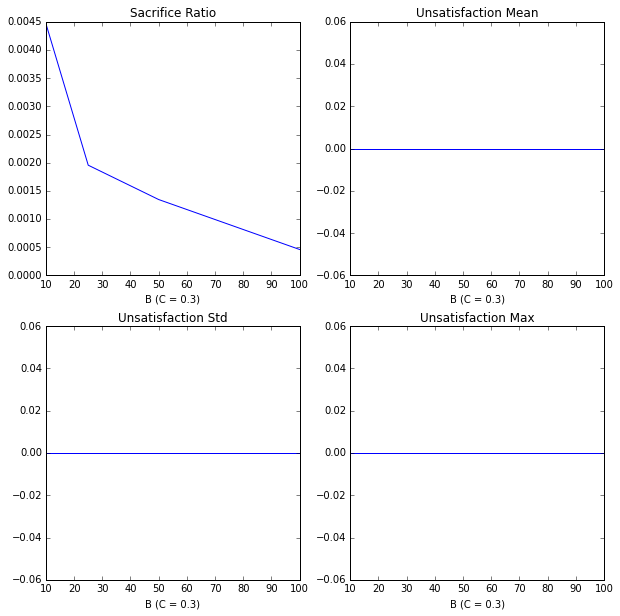

In [4]:
param_name = "B (C = 0.3)"
params = [10, 25, 50, 100]
metrics = read_data("outputs/smpc_b/xc", "smpc_c_0_3_b_{}", params, 0)
result_plot(metrics, param_name, params, False)

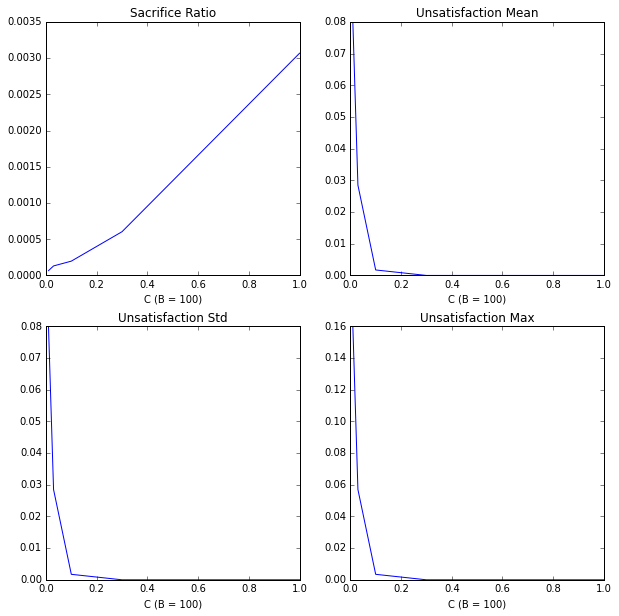

In [5]:
param_name = "C (B = 100)"
params = [0.01, 0.03, 0.1, 0.3, 1.0]
metrics = read_data("outputs/smpc_c/xc", "smpc_c_{}_b_100", params, 0)
result_plot(metrics, param_name, params, False)

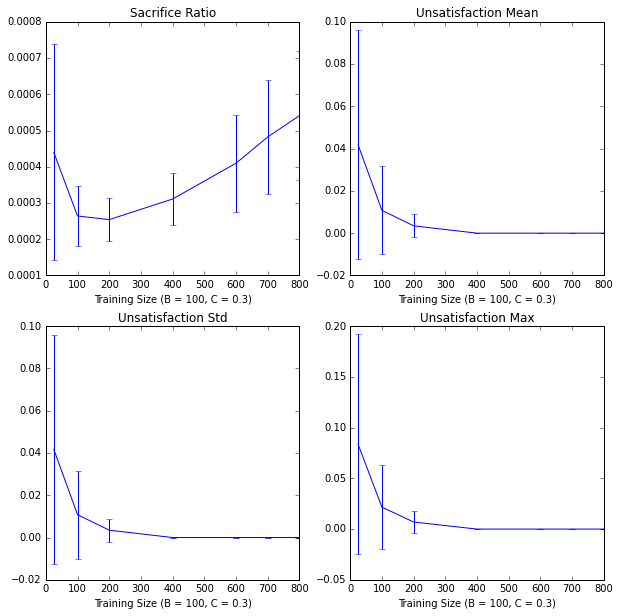

In [6]:
param_name = "Training Size (B = 100, C = 0.3)"
params = [25, 100, 200, 400, 600, 700, 800]
metrics = read_data("outputs/smpc_ts/xc", "smpc_ts_{}_c_0_3_b_100_seed_{}", params, 5)
result_plot(metrics, param_name, params, True)

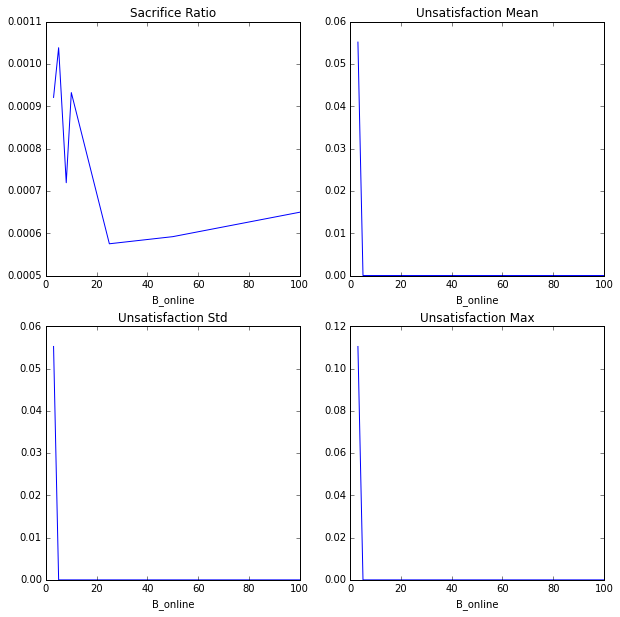

In [7]:
param_name = "B_online"
params = [3, 5, 8, 10, 25, 50, 100]
metrics = read_data("outputs/smpc_bo/xc", "smpc_c_0_3_b_100_bo_{}", params, 0)
result_plot(metrics, param_name, params, False)

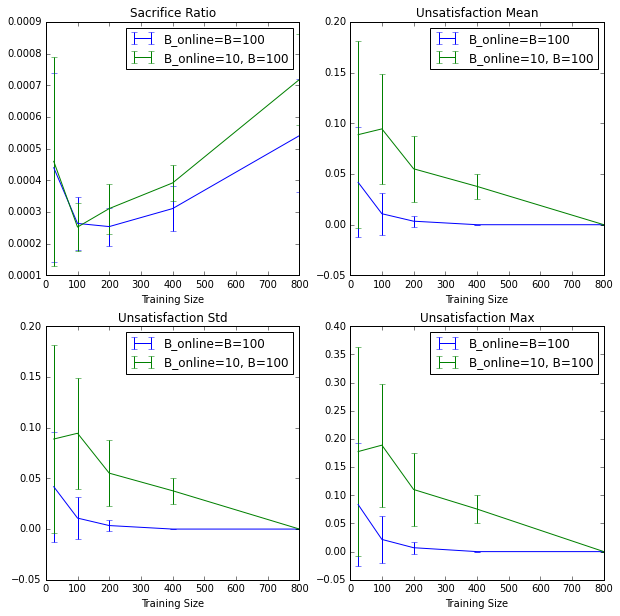

In [8]:
param_name = "Training Size"
params = [25, 100, 200, 400, 800]
metrics = {
    "B_online=B=100": read_data("outputs/smpc_ts/xc", "smpc_ts_{}_c_0_3_b_100_seed_{}", params, 5), 
    "B_online=10, B=100" : read_data("outputs/smpc_bo_ts/xc", "smpc_ts_{}_c_0_3_b_100_bo_10_seed_{}", params, 5),
}
result_plot(metrics, param_name, params, True)

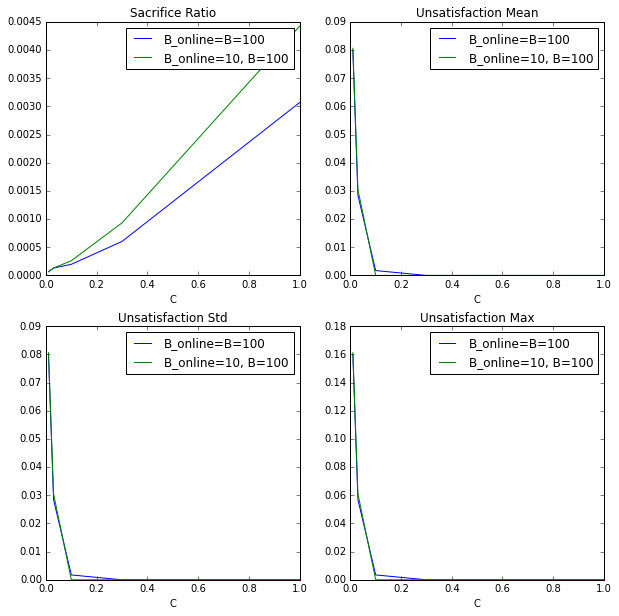

In [9]:
param_name = "C"
params = [0.01, 0.03, 0.1, 0.3, 1.0]
metrics = {
    "B_online=B=100": read_data("outputs/smpc_c/xc", "smpc_c_{}_b_100", params, 0),
    "B_online=10, B=100": read_data("outputs/smpc_bo_c/xc", "smpc_c_{}_b_100_bo_10", params, 0),
}
result_plot(metrics, param_name, params, False)

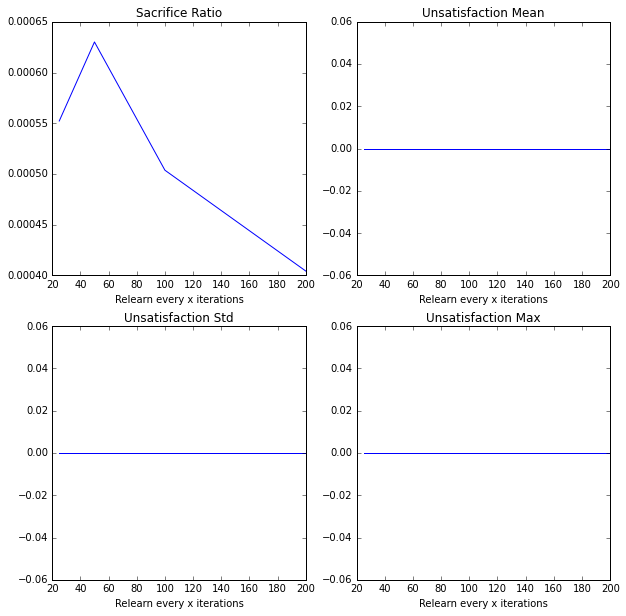

In [10]:
param_name = "Relearn every x iterations"
params = [25, 50, 100, 200]
metrics = read_data("outputs/smpc_relearn/xc", "smpc_relearn_{}_c_0_3_b_100", params, 0)
result_plot(metrics, param_name, params, False)

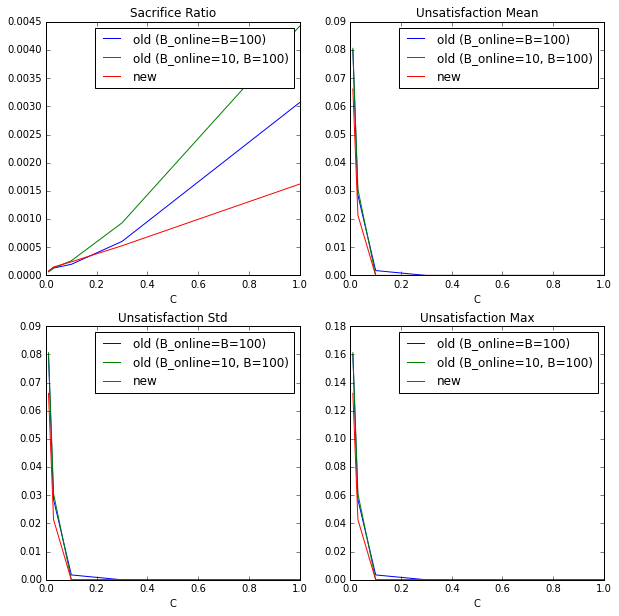

In [11]:
param_name = "C"
params = [0.01, 0.03, 0.1, 0.3, 1.0]
metrics = {
    "old (B_online=B=100)": read_data("outputs/smpc_c/xc", "smpc_c_{}_b_100", params, 0),
    "old (B_online=10, B=100)": read_data("outputs/smpc_bo_c/xc", "smpc_c_{}_b_100_bo_10", params, 0),
    "new": read_data("outputs/smpca_c/xc", "smpca_c_{}_b_100_bo_10", params, 0),
}
result_plot(metrics, param_name, params, False)